In [1]:
# "nbsphinx": "hidden" 
import os
os.chdir("../../../tests/datasets")

# Quickstart

This chapter aims to explain how to use GalaxyChop in general. Here
you can see a simple example of

- Reading a galaxy from a file 
  [HDF5](https://www.hdfgroup.org/solutions/hdf5/).
- Explore the attributes of the galaxy.
- Some graphics.
- Aligning and centering the galaxies.
- A simple decomposition.

### 1. Conceptual overview

By a design decision, and after several prototypes, GalaxyChop was designed in two 
layers

1. A data representation level, where we defined a class `Galaxy` which encapsulates all the physical properties useful for the  dynamic decomposition.
2. A `models` level, which understands the `Galaxy` instances and returns an instance of type `Components` which represents "to which part of the galaxy each stellar particle corresponds to".

This first tutorial aims only to give an overview of the project and not to 
go into too specific details.

<div class="alert alert-info">
Note: About the content

This tutorial is not intended to be a scientific explanation of why and how 
to perform a dynamic decomposition of galaxies, only to explain the functionalities of GalaxyChop.
</div>


### 2. Creating your first Galaxy

GalaxyChop represents galaxies with a [class](https://en.wikipedia.org/wiki/Class_(computer_programming)) called `galaxychop.Galaxy`, which is a collection of *gas*, *dark matter* and *stars* particles each characterized by 3 positions, three velocities, masses and various energies.

To create a `Galaxy` type object, there are several alternatives, the most useful being to read all the data from a file type [HDF5](https://www.hdfgroup.org/solutions/hdf5/).

So first of all it is necessary to obtain a file with the appropriate content. It is recommended to download this file [gal394242.h5](https://github.com/vcristiani/galaxy-chop/raw/master/tests/datasets/gal394242.h5) and place it where it is convenient for you.

<div class="alert alert-info">
Note

For convenience we have placed the file `gal394242.h5` in the same folder where this tutorial is located.
</div>

As a first step it is necessary to import the *GalaxChop* library, and by simple habit we have taken the practice of assigning to the library the alias `gchop`.

In [2]:
import galaxychop as gchop

Next we load the file *gal394242.h5* using the `read_hdf5` function.
This will generate an instance of the `gchop.Galaxy` class.

In [3]:
gal = gchop.read_hdf5("gal394242.h5")
gal

<Galaxy stars=37393, dark_matter=155101, gas=80153, potential=True>

### 3. Galaxy attributes

Galaxies internally consist of **three sets of particles** , one for `stars`, 
one for `dark_matter` and one for `gas`. 

All these sets can be accessed, and expose a set of physical properties 

For example, if we wanted to access the positions (`x`, `y`, and `z`) of 
the stellar particles:

In [4]:
gal.stars.x, gal.stars.y, gal.stars.z

(<Quantity [ 4.56302827e-02, -9.44694000e-02, -1.72212507e-01, ...,
             2.26734653e+01,  2.19026432e+02,  9.21102196e+00] kpc>,
 <Quantity [ 2.37918275e-02,  5.48672004e-02, -5.10932153e-04, ...,
            -5.65387956e+00,  1.62543699e+02,  1.15887802e+01] kpc>,
 <Quantity [-3.64265980e-02,  6.08437429e-03,  4.76002183e-02, ...,
            -5.40957006e+01,  7.41502485e+01,  7.57378924e+00] kpc>)

It can be observed that the positions have [units](https://docs.astropy.org/en/stable/units/index.html) which can be bypassed using the `arr_` accessor. 

For example if we would like to access the `gas` masses (`m`) but without units:

In [5]:
gal.gas.arr_.m

array([2579202.70087197, 1368584.63520184, 1392260.60127839, ...,
       1690579.66559194, 1210974.6603528 , 1023048.3894702 ])

The galaxy instances, on the other hand, have useful methods to summarize the data from the three sets, such as 
summarize the data coming from the three sets, such as `angular_momentum_` or `gal.kinetic_energy_`.  

Finally both the arrays and the galaxy in general have methods to
create [Pandas DataFrames](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) with the particle data.

In [6]:
gal.to_dataframe()

,ptype,ptypev,m,x,y,z,vx,vy,vz,softening,potential,kinetic_energy,total_energy,Jx,Jy,Jz
0,stars,0,5.224283e+05,0.045630,0.023792,-0.036427,10.773575,-6.878906,-20.425400,0.0,-195699.620206,290.293111,-195409.327095,-0.736533,0.539572,-0.570209
1,stars,0,9.745897e+05,-0.094469,0.054867,0.006084,20.282349,8.661957,-7.947495,0.0,-196176.962277,274.782915,-195902.179362,-0.488759,-0.627390,-1.931126
2,stars,0,6.935776e+05,-0.172213,-0.000511,0.047600,-14.897980,6.957092,-10.818886,0.0,-195152.120168,193.699612,-194958.420557,-0.325631,-2.572295,-1.205710
3,stars,0,1.070959e+06,-0.081766,-0.116694,0.177133,-8.665253,-4.337433,5.506927,0.0,-194695.767625,62.113089,-194633.654536,0.125676,-1.084623,-0.656530
4,stars,0,6.013803e+05,0.020734,0.023444,0.101449,23.508469,-7.842865,-3.754723,0.0,-195703.942688,314.128285,-195389.814402,0.707622,2.462754,-0.713749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272642,gas,2,1.429845e+06,44.246486,-253.661747,-240.888732,-44.183670,-152.597656,69.413803,0.0,-17314.963254,15028.258726,-2286.704528,-54366.682527,7572.031389,-17959.617014
272643,gas,2,1.436841e+06,-37.380023,-250.988099,-125.929722,-69.019005,-67.030350,35.370728,0.0,-20910.620132,5253.889589,-15656.730543,-17318.744973,10013.702701,-14817.352798
272644,gas,2,1.690580e+06,16.542737,-267.716920,-226.546536,-61.974457,-122.167450,98.398193,0.0,-17358.735183,14223.961789,-3134.773394,-54019.473934,12412.323127,-18612.594663
272645,gas,2,1.210975e+06,-220.426329,79.421367,46.584759,-96.530602,18.881409,-45.233887,0.0,-23427.833806,5860.384564,-17567.449242,-4472.122980,-14467.594426,3504.632690


### 4. Visualizing the galaxy

Galaxies have a set of utilities to visualize on the one hand all the particles in the real space; and on the other hand only the stellar ones in the circularity space. 

Thus a good summary plot of a galaxy can be made with the command:

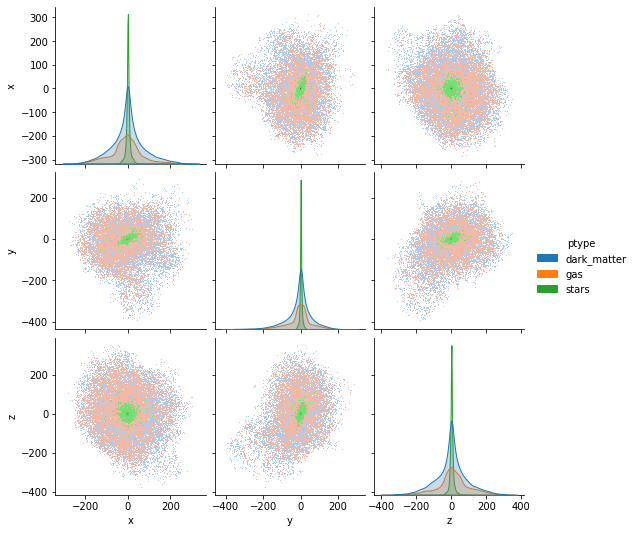

In [7]:
gal.plot()

At this point we observe in the graph that the galaxy is neither centered nor aligned, this can be validated with:

In [8]:
print("Centered:", gchop.preproc.is_centered(gal))
print("Aligned:", gchop.preproc.is_star_aligned(gal))

Centered: False
Aligned: False


Or the two questions combined:

In [9]:
print("Centered & Aligned:", gchop.preproc.is_centered_and_aligned(gal))

Centered & Aligned: False


To correct this you can use the functions `center()` and 
`star_align()` in that order, or the shortcut `center_and_align()` 
which applies the two operations in one call

In [10]:
gal = gchop.preproc.center_and_align(gal)
print("Centered:", gchop.preproc.is_centered(gal))
print("Aligned:", gchop.preproc.is_star_aligned(gal))
print("Centered & Aligned:", gchop.preproc.is_centered_and_aligned(gal))

Centered: True
Aligned: True
Centered & Aligned: True


We can also visualize the result, for example by comparing the positions at `x` and `y`, highlighting according to the particle type.

In [11]:
gal.plot.hist("x", "y", labels="ptype")

TypeError: GalaxyPlotter.hist() takes 2 positional arguments but 3 positional arguments (and 1 keyword-only argument) were given

### 5. Galaxy decomposition

Finally, let's decompose a galaxy into its parts. The package offers several decomposition models as well as a framework to create new methods. methods. 

For didactic reasons we will stick to the method presented in the work of [Abadi et al.(2003)](https://ui.adsabs.harvard.edu/abs/2003ApJ...597...21A), which in the context of GalaxyChop is called `JHistogram`.

The analysis can be summarized in the following steps

1. Instantiate the decomposer

In [ ]:
decomp = gchop.models.JThreshold()

2. Decompose the galaxy into components

In [ ]:
components = decomp.decompose(gal)
components

<Components length=57284, labels={'Disk', nan, 'Spheroid'}, probabilities=False, lmap=True>

As you can see by the labels `{'Disk', 'Spheroid', nan}` the decomposer found two components (`Disk` and `Spheroid`) and could not classify at least one particle, so the meaning of `nan` for Galaxychop can be understood as "I don't know what to do with this particle".

Another detail to take into account is that GalaxyChop decomposes galaxies, but since the dynamic decomposition for `gas` and `dark matter` is not defined, it assigns the label `nan` to all this kind of particles.

Finally, it is seen that this classifier does not provide probabilities of particle belonging to a label as it does particle to a label as does `GaussianMixture`.

3. Now we can see the division of the particles in the circularity space.

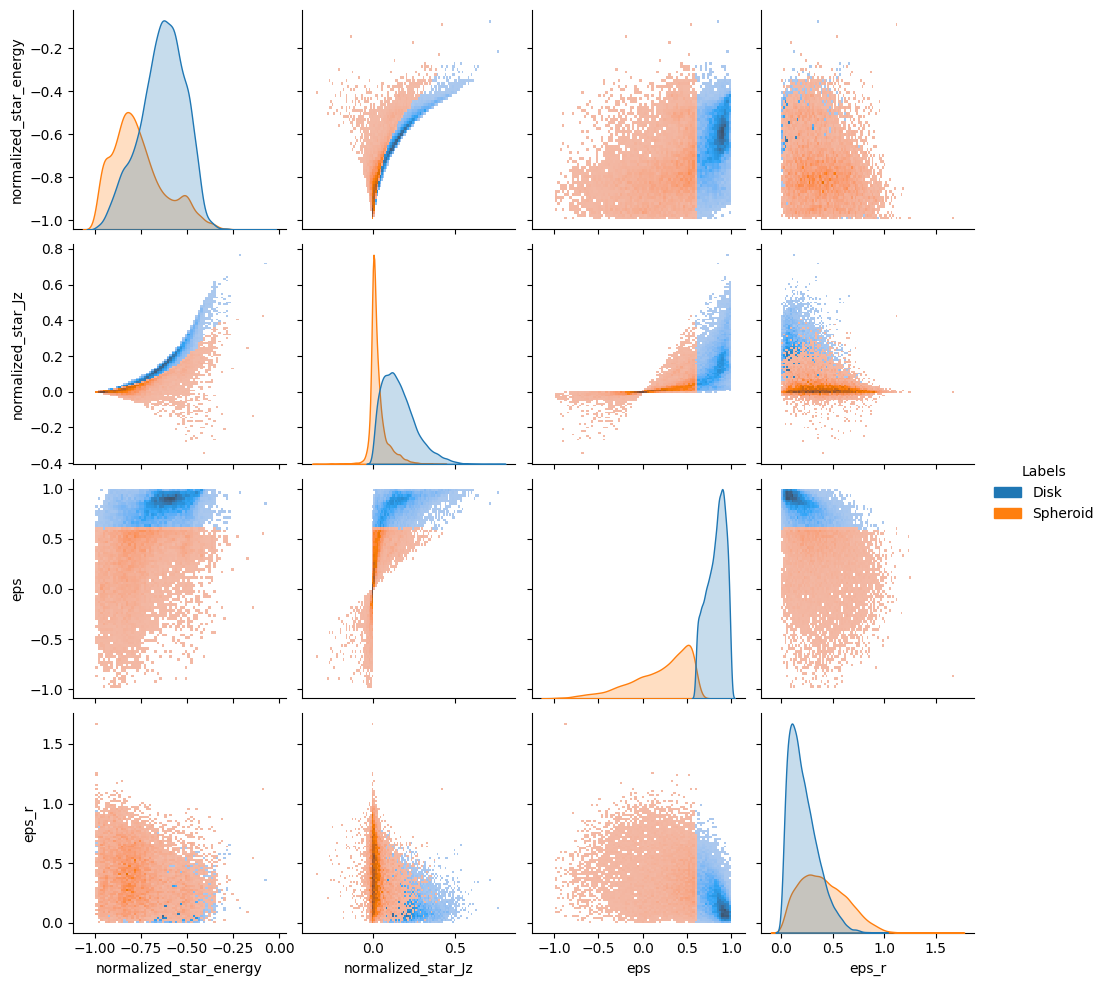

In [ ]:
gal.plot.circ_pairplot(labels=components)

or in the real space

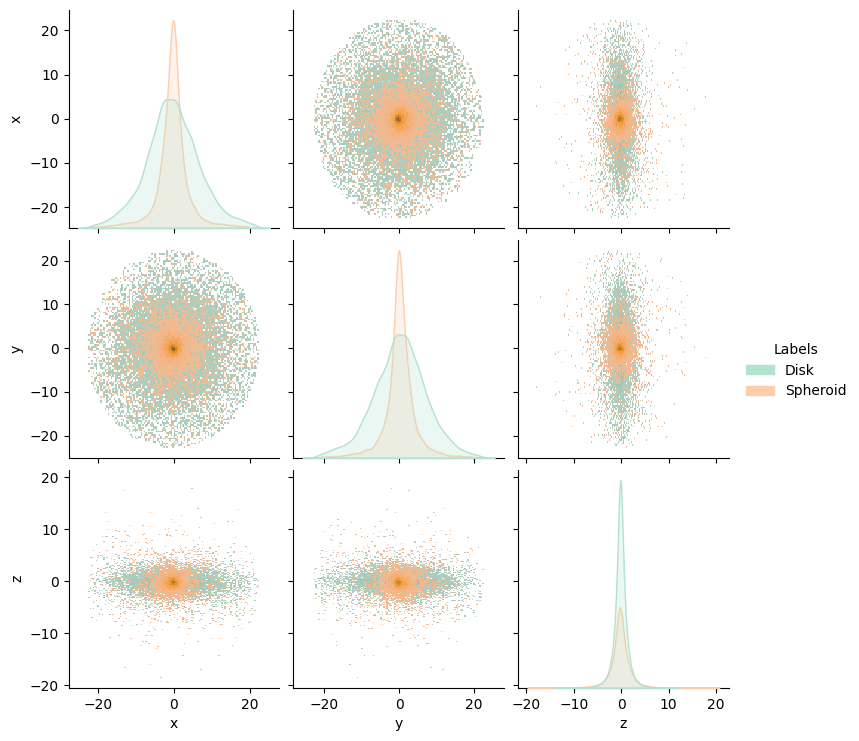

In [ ]:
gal.plot.pairplot(labels=components, palette="Pastel2")

Finally you can convert the entire components into a `Dataframe`

In [ ]:
components.to_dataframe()

,m,labels,ptypes,lmap
0,5.224283e+05,0.0,stars,Spheroid
1,9.745897e+05,0.0,stars,Spheroid
2,6.935776e+05,0.0,stars,Spheroid
3,1.070959e+06,0.0,stars,Spheroid
4,6.013803e+05,0.0,stars,Spheroid
...,...,...,...,...
57279,1.400046e+06,NaN,gas,NaN
57280,1.375867e+06,NaN,gas,NaN
57281,9.908498e+05,NaN,gas,NaN
57282,1.456959e+06,NaN,gas,NaN
